/home/alm72/.conda/envs/KYorg_env/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


Trying to set attribute `.uns` of view, copying.


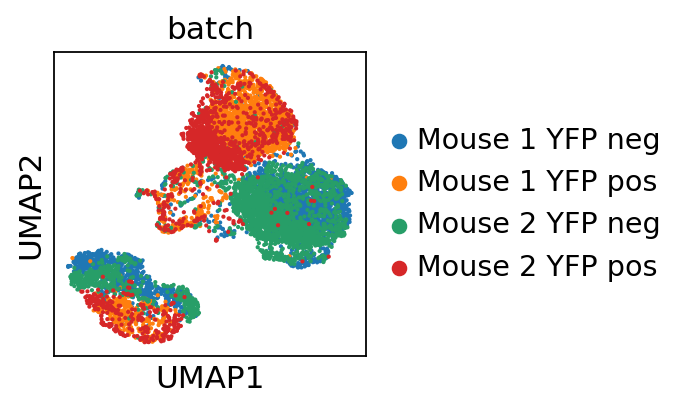

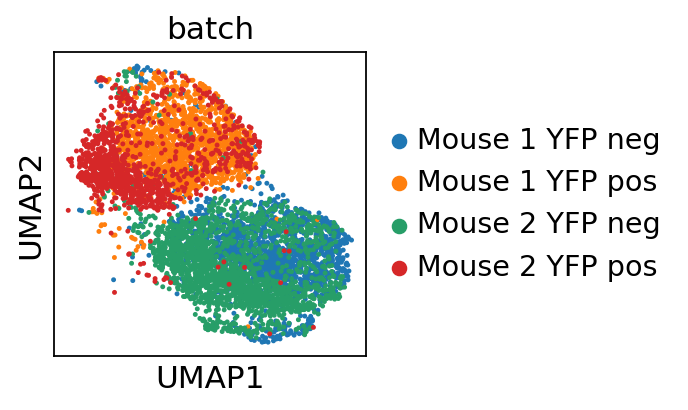

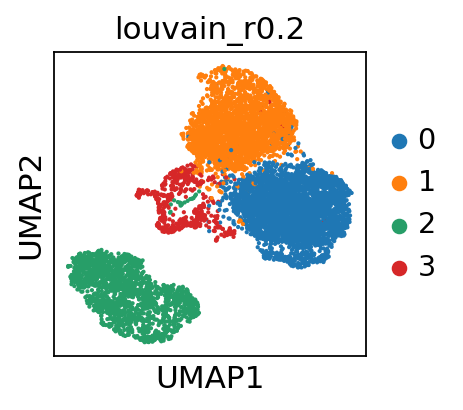

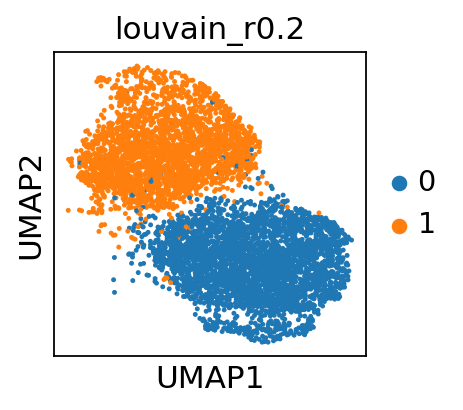

In [1]:
import scanpy.external as sce
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
from matplotlib.pyplot import suptitle
import matplotlib.colors

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

subset_results_file = './write/invivo_epithelial_subset.h5ad'
adata_subset = sc.read(subset_results_file)

# SUBSET AT2 DATA
adata_at2 = adata_subset[adata_subset.obs['louvain_r0.2'].isin(['0','1'])]

# CHECK UPLAOD
sc.settings.set_figure_params(dpi=80) # aesthetic

list = [adata_subset, adata_at2]
figsize = 2.5,2.5

for i in list:
    rcParams['figure.figsize']=figsize
    sc.pl.umap(i, color='batch', show = False)
    
for i in list:
    rcParams['figure.figsize']=figsize
    sc.pl.umap(i, color='louvain_r0.2', show = False)

/home/alm72/.conda/envs/KYorg_env/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, -245.97222222222229, 'Cells')

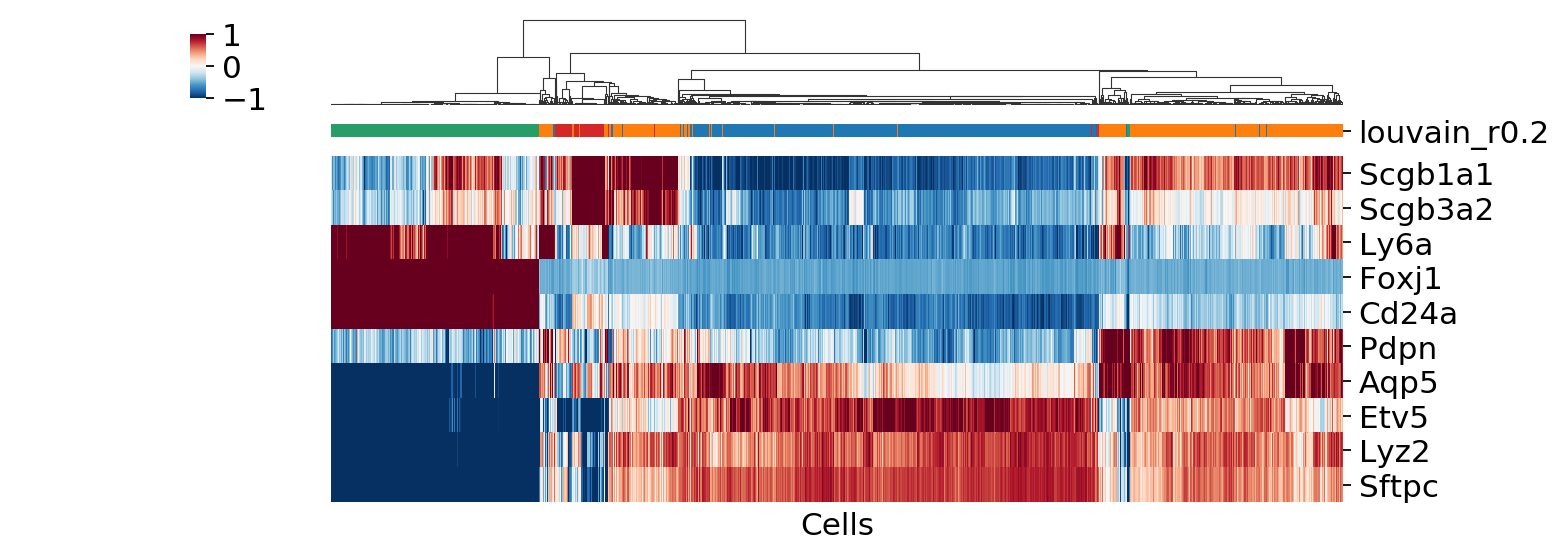

In [4]:
bdata = adata_subset.copy()

# create new df with adata.obs index
df = pd.DataFrame(index=bdata.obs.index)

# geens to add
genes=['Lyz2','Etv5','Sftpc','Scgb1a1','Scgb3a2','Foxj1','Cd24a','Ly6a','Pdpn','Aqp5']

# z-normalize expression
z_scores = sc.pp.scale(bdata, copy=True)

# add genes to df
for gene in genes:
    df[gene]=z_scores[:, [gene]].to_df()

# order columns and transpose. Skip if row_cluster=True
cols=['Scgb1a1','Scgb3a2','Ly6a','Foxj1','Cd24a','Pdpn','Aqp5','Etv5','Lyz2','Sftpc']
df = df[cols]
df = df.T

# column color mapping
louvain = bdata.obs['louvain_r0.2'].astype('object')
lut = dict(zip(louvain.unique(), ['#1f77b4','#279e68','#ff7f0e','#d62728']))
col_colors = louvain.map(lut)

# plot clustermap
g = sb.clustermap(df, vmin=-1, vmax=1, center=0, cmap='RdBu_r', metric="correlation", row_cluster=False,
                   figsize=(10, 8), cbar_pos=(0.13, .9, .01, .05), # locxaxis,locyaxis,cbarwidth,cbarheight
                   col_colors=col_colors
                   ) 
# access heatmap axes
ax = g.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("Cells")